In [121]:
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
filename = os.path.join(os.getcwd(), "dataframes", "actEnglish_11.csv")
actEnglish11_df = pd.read_csv(filename, header = 0)

filename2 = os.path.join(os.getcwd(), "dataframes", "actMath_11.csv")
actMath11_df = pd.read_csv(filename2, header = 0)

filename3 = os.path.join(os.getcwd(), "dataframes", "actScience_11.csv")
actScience11_df = pd.read_csv(filename3, header = 0)

filename4 = os.path.join(os.getcwd(), "dataframes", "actReading_11.csv")
actReading11_df = pd.read_csv(filename4, header = 0)
                         

In [123]:
actEnglish11_df.head()

,studentId,is_proficient,proficient_score,proficient_diff,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,...,course_YearbkII9-12,course_Yearbook9-12,course_YrbkIII9-12,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy
0,45054,False,0.166667,-15.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
1,45054,False,0.166667,-15.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
2,45440,False,0.833333,-3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3,45440,False,0.833333,-3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
4,45440,False,0.833333,-3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [124]:
actEnglish11_df.shape

(3837, 242)

In [125]:
count_school_columns = actEnglish11_df.columns.str.startswith('course_').sum()

print(count_school_columns)

231


In [126]:
actEnglish11_df.describe()

,studentId,proficient_score,proficient_diff,iready_math,iready_reading,bbb_literacy
count,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.0
mean,67232.586396,0.910723,-1.606985,0.013552,0.029189,0.0
std,31291.701423,0.310402,5.587239,0.160889,0.239879,0.0
min,45054.000000,0.166667,-15.000000,0.000000,0.000000,0.0
25%,47569.000000,0.666667,-6.000000,0.000000,0.000000,0.0
50%,47944.000000,0.888889,-2.000000,0.000000,0.000000,0.0
75%,97110.000000,1.111111,2.000000,0.000000,0.000000,0.0
max,123174.000000,2.000000,18.000000,2.000000,2.000000,0.0


In [127]:
columns_with_few_true = actEnglish11_df.columns[(actEnglish11_df.sum() < 200)].tolist()

# Get the length of the list
length_of_list = len(columns_with_few_true)
length_of_list

213

In [128]:
droped_actEnglish11_df = actEnglish11_df.drop(columns=columns_with_few_true)

In [129]:
droped_actEnglish11_df.columns

Index(['studentId', 'is_proficient', 'proficient_score', 'course_Alg II/Trig',
       'course_Algebra I B', 'course_BullBogAdv', 'course_CareerPrep-B',
       'course_ChemistryAdv', 'course_D&TSafetyEd', 'course_DRIVERS ED',
       'course_Eng Gr10 Adv', 'course_English Gr10', 'course_FACS',
       'course_Geometry', 'course_HEALTH 9-12', 'course_Health 9-12',
       'course_LIFE PE 9-12', 'course_Mustang Advi', 'course_Panther Adv',
       'course_Physical Sci', 'course_Spanish 1', 'course_US His-1877',
       'course_USHis I Adv', 'course_USHis I G10', 'course_VarFBII',
       'school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D'],
      dtype='object')

In [130]:
potential_features = ['is_proficient', 'course_Alg II/Trig', 'course_Algebra I B', 'course_BullBogAdv', 'course_CareerPrep-B', 'course_ChemistryAdv', 'course_Eng Gr10 Adv', 'course_English Gr10', 'course_FACS', 'course_Geometry', 'course_HEALTH 9-12', 'course_Health 9-12', 'course_Mustang Advi', 'course_Panther Adv',
       'course_Physical Sci', 'course_Spanish 1', 'course_US His-1877',
       'course_USHis I Adv', 'course_USHis I G10', 'course_VarFBII',]

In [131]:
true_count_ACT_Review = actEnglish11_df['course_ACT/WK Rev.'].sum()
true_count_ACT_Review

np.int64(24)

# Clustering for ACT English 11

Proficiency vs courses (dropped courses with < 200 True values)

In [132]:
#droped_actEnglish11_df[potential_features] = droped_actEnglish11_df[potential_features].astype(int)

In [133]:
# subset_dropped_actEnglish11_df = droped_actEnglish11_df[potential_features]
# subset_dropped_actEnglish11_df.head()

In [134]:
from kmodes.kmodes import KModes

In [135]:
# cost = []
# K = range(1,5)
# for k in list(K):
#     kmode = KModes(n_clusters = k, init = "random", n_init = 5, verbose = 1)
#     kmode.fit_predict(subset_dropped_actEnglish11_df)
#     cost.append(kmode.cost_)
# plt.plot(K, cost, 'x-') 
# plt.xlabel('No. of clusters') 
# plt.ylabel('Cost') 
# plt.title('Elbow Curve') 
# plt.show()

In [136]:
# #Using 3 clusters
# kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1) 
# clusters = kmode.fit_predict(subset_dropped_actEnglish11_df) 
# subset_dropped_actEnglish11_df['Cluster'] = clusters
# subset_dropped_actEnglish11_df.head()

In [137]:
# sns.countplot(data=subset_dropped_actEnglish11_df, x='Cluster', hue='is_proficient')
# plt.title('Cluster Distribution by is_proficient')
# plt.show()

Proficiency vs school using KModes

In [138]:
columns_to_convert = ['is_proficient', 'school_High School A', 'school_High School B', 'school_High School C', 'school_High School D']  
actEnglish11_df[columns_to_convert] = actEnglish11_df[columns_to_convert].astype(int)

In [139]:
subset_actEnglish11_df = actEnglish11_df[['studentId', 'is_proficient', 'school_High School A', 'school_High School B', 'school_High School C', 'school_High School D']]

In [140]:
subset_actEnglish11_df.head()

,studentId,is_proficient,school_High School A,school_High School B,school_High School C,school_High School D
0,45054,0,1,0,0,0
1,45054,0,1,0,0,0
2,45440,0,0,0,0,0
3,45440,0,0,0,0,0
4,45440,0,0,0,0,0


In [141]:
true_count = actEnglish11_df['is_proficient'].sum()
true_count

np.int64(1467)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8077.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


Run 2, iteration: 1/100, moves: 0, cost: 8077.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8077.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8077.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8077.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 520, cost: 6604.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 695, cost: 6604.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 162, cost: 7753.0
Init: initializing centroids

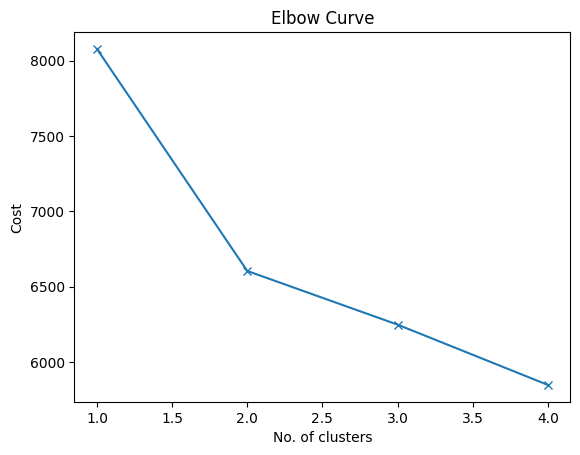

In [142]:
cost = []
K = range(1,5)
for k in list(K):
    kmode = KModes(n_clusters = k, init = "random", n_init = 5, verbose = 1)
    kmode.fit_predict(subset_actEnglish11_df)
    cost.append(kmode.cost_)
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [143]:
#Using 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1) 
clusters = kmode.fit_predict(subset_actEnglish11_df) 
subset_actEnglish11_df['Cluster'] = clusters
subset_actEnglish11_df.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1463, cost: 6604.0
Run 1, iteration: 2/100, moves: 0, cost: 6604.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7663.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 7078.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 929, cost: 7140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 7140.0
Best run was number 1


/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_70661/276644919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_actEnglish11_df['Cluster'] = clusters


,studentId,is_proficient,school_High School A,school_High School B,school_High School C,school_High School D,Cluster
0,45054,0,1,0,0,0,0
1,45054,0,1,0,0,0,0
2,45440,0,0,0,0,0,0
3,45440,0,0,0,0,0,0
4,45440,0,0,0,0,0,0


In [144]:
print(subset_actEnglish11_df['Cluster'].value_counts())


Cluster
0    2370
1    1467
Name: count, dtype: int64


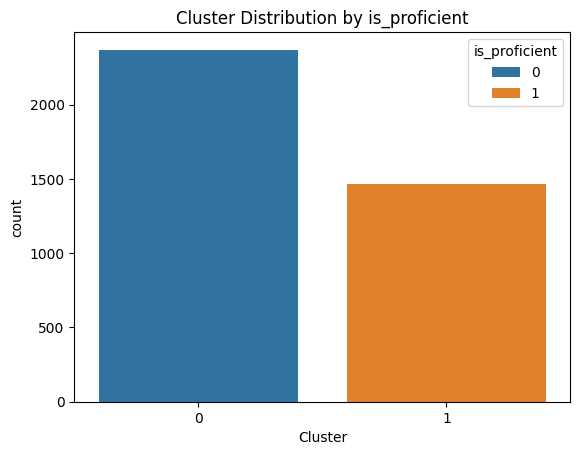

In [145]:
sns.countplot(data=subset_actEnglish11_df, x='Cluster', hue='is_proficient')
plt.title('Cluster Distribution by is_proficient')
plt.show()


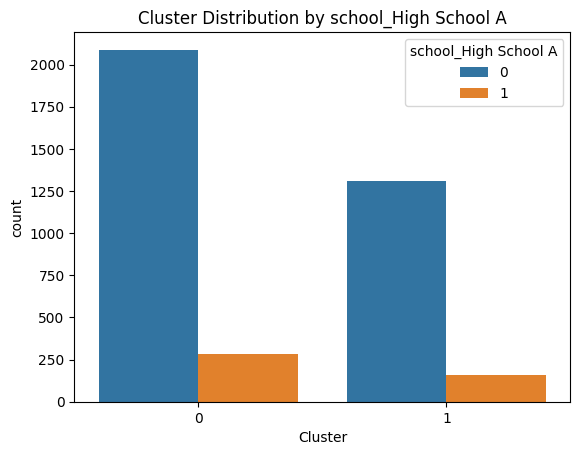

In [146]:
sns.countplot(data=subset_actEnglish11_df, x='Cluster', hue='school_High School A')
plt.title('Cluster Distribution by school_High School A')
plt.show()

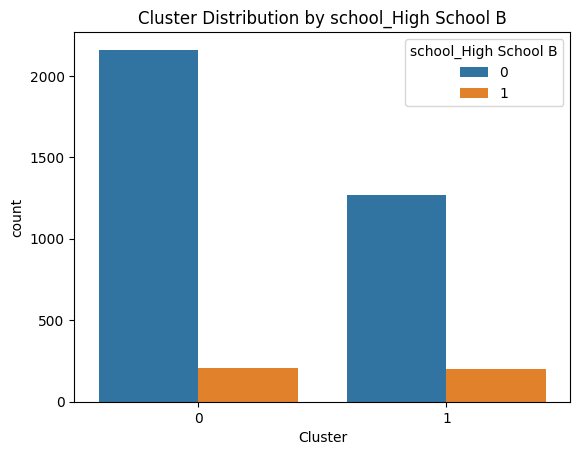

In [147]:
sns.countplot(data=subset_actEnglish11_df, x='Cluster', hue='school_High School B')
plt.title('Cluster Distribution by school_High School B')
plt.show()

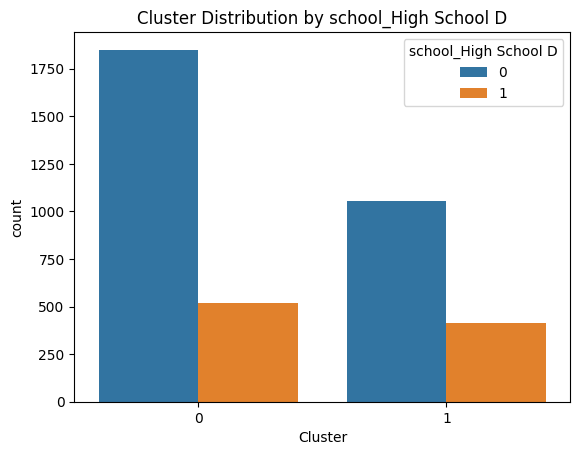

In [148]:
sns.countplot(data=subset_actEnglish11_df, x='Cluster', hue='school_High School D')
plt.title('Cluster Distribution by school_High School D')
plt.show()

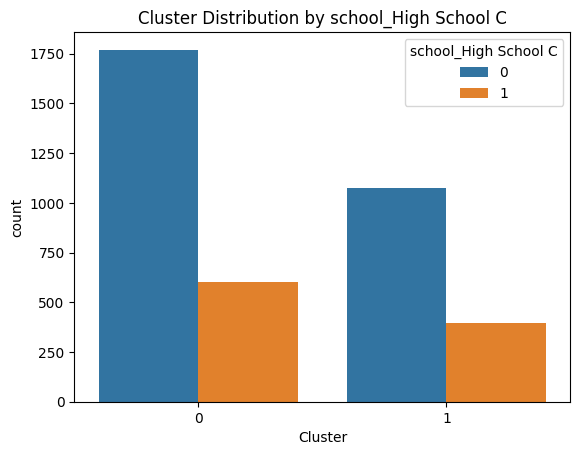

In [149]:
sns.countplot(data=subset_actEnglish11_df, x='Cluster', hue='school_High School C')
plt.title('Cluster Distribution by school_High School C')
plt.show()

# End Clustering for ACT English 11

# Begin Clustering for ACT Math 11

In [150]:
columns_to_convert_2 = ['is_proficient', 'school_High School A', 'school_High School B', 'school_High School C', 'school_High School D'] 
actMath11_df[columns_to_convert] = actMath11_df[columns_to_convert].astype(int)
subset_actMath11_df = actMath11_df[['studentId', 'is_proficient', 'school_High School A', 'school_High School B', 'school_High School C', 'school_High School D']]
subset_actMath11_df.head()

,studentId,is_proficient,school_High School A,school_High School B,school_High School C,school_High School D
0,45054,0,1,0,0,0
1,45054,0,1,0,0,0
2,45440,0,0,0,0,0
3,45440,0,0,0,0,0
4,45440,0,0,0,0,0


In [151]:
true_count2 = actMath11_df['is_proficient'].sum()
true_count2


np.int64(1603)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8213.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 660, cost: 6610.0
Run 2, iteration: 2/100, moves: 375, cost: 6610.0
Init: initializing centroids
I

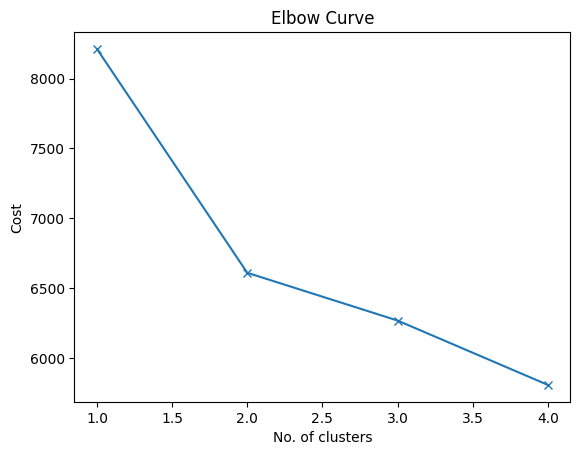

In [152]:
cost2 = []
K2 = range(1,5)
for k2 in list(K2):
   kmode2 = KModes(n_clusters = k2, init = "random", n_init = 5, verbose = 1)
   kmode2.fit_predict(subset_actMath11_df)
   cost2.append(kmode2.cost_)
plt.plot(K2, cost2, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()


In [153]:
#Using 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(subset_actMath11_df)
subset_actMath11_df['Cluster'] = clusters
subset_actMath11_df.head()
print(subset_actMath11_df['Cluster'].value_counts())

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 458, cost: 7267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 458, cost: 7267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 458, cost: 7267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1132, cost: 6604.0
Run 5, iteration: 2/100, moves: 462, cost: 6604.0
Best run was number 5
Cluster
1    2234
0    1603
Name: count, dtype: int64


/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_70661/3258681020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_actMath11_df['Cluster'] = clusters


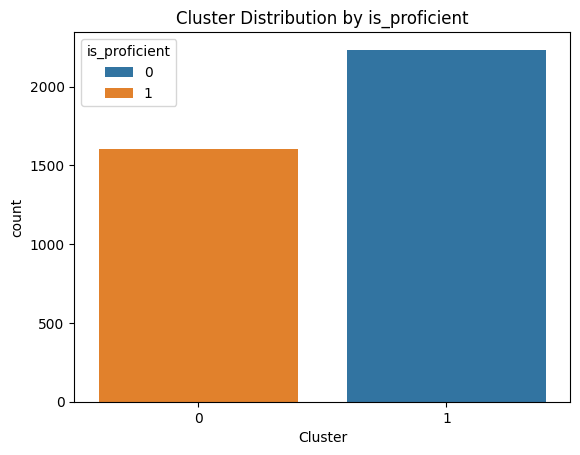

In [154]:
sns.countplot(data=subset_actMath11_df, x='Cluster', hue='is_proficient')
plt.title('Cluster Distribution by is_proficient')
plt.show()

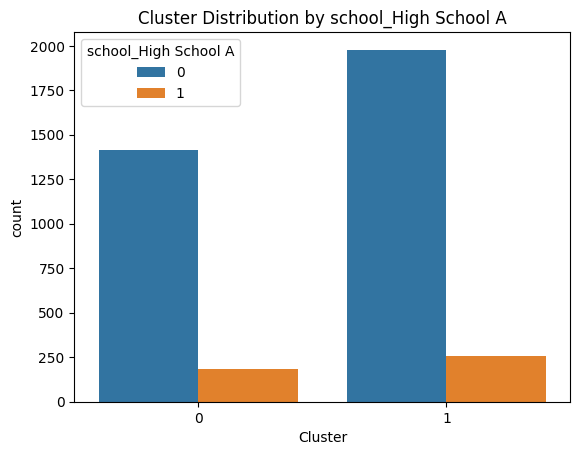

In [155]:
sns.countplot(data=subset_actMath11_df, x='Cluster', hue='school_High School A')
plt.title('Cluster Distribution by school_High School A')
plt.show()

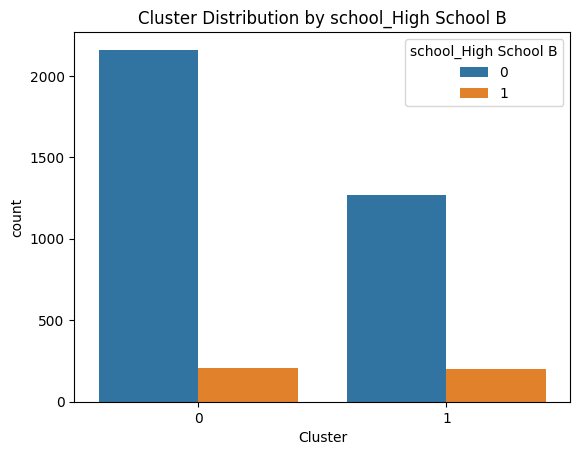

In [156]:
sns.countplot(data=subset_actEnglish11_df, x='Cluster', hue='school_High School B')
plt.title('Cluster Distribution by school_High School B')
plt.show()

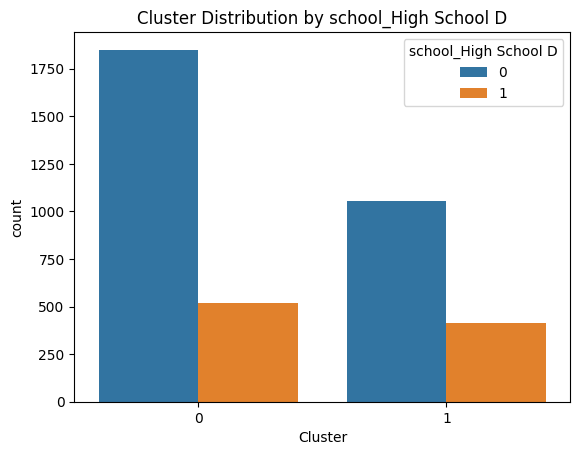

In [157]:
sns.countplot(data=subset_actEnglish11_df, x='Cluster', hue='school_High School D')
plt.title('Cluster Distribution by school_High School D')
plt.show()

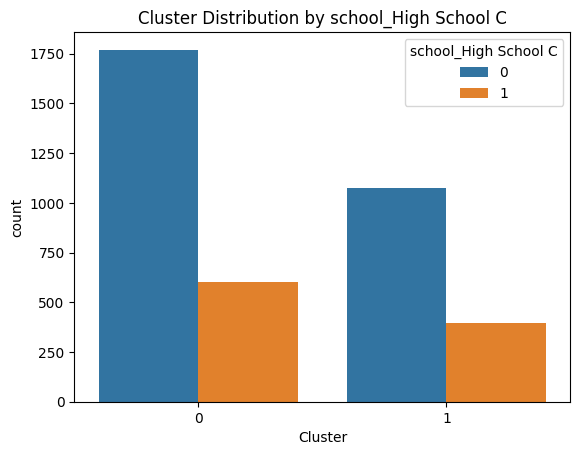

In [158]:
sns.countplot(data=subset_actEnglish11_df, x='Cluster', hue='school_High School C')
plt.title('Cluster Distribution by school_High School C')
plt.show()

# End Clustering for ACT Math 11

# Begin Clustering for ACT Science 11

In [163]:
columns_to_convert = ['is_proficient', 'school_High School A', 'school_High School B', 'school_High School C', 'school_High School D'] 
actScience11_df[columns_to_convert] = actScience11_df[columns_to_convert].astype(int)
subset_actScience11_df = actScience11_df[['studentId', 'is_proficient', 'school_High School A', 'school_High School B', 'school_High School C', 'school_High School D']]
subset_actScience11_df.head()



,studentId,is_proficient,school_High School A,school_High School B,school_High School C,school_High School D
0,45054,0,1,0,0,0
1,45054,0,1,0,0,0
2,45440,0,0,0,0,0
3,45440,0,0,0,0,0
4,45440,0,0,0,0,0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8459.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8459.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8459.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8459.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8459.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6604.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 350, cost: 6604.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


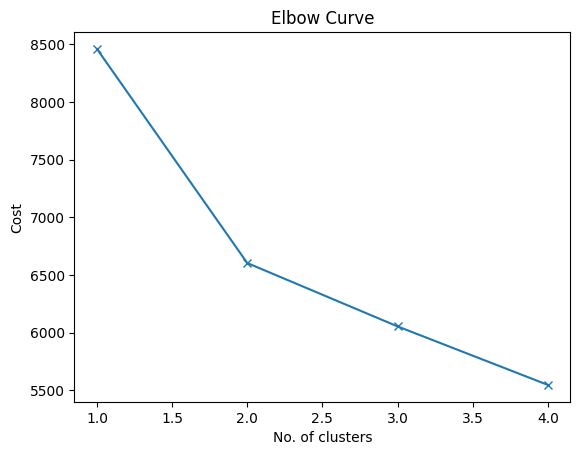

In [164]:
cost = []
K = range(1,5)
for k in list(K):
   kmode = KModes(n_clusters = k, init = "random", n_init = 5, verbose = 1)
   kmode.fit_predict(subset_actScience11_df)
   cost.append(kmode.cost_)
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()


In [165]:
#Using 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(subset_actScience11_df)
subset_actScience11_df['Cluster'] = clusters
subset_actScience11_df.head()
print(subset_actScience11_df['Cluster'].value_counts())


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1346, cost: 6604.0
Run 1, iteration: 2/100, moves: 430, cost: 6604.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 6604.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 430, cost: 6604.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 450, cost: 6604.0
Run 4, iteration: 2/100, moves: 0, cost: 6604.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1346, cost: 6604.0
Run 5, iteration: 2/100, moves: 430, cost: 6604.0
Best run was number 1
Cluster
1    1988
0    1849
Name: count, dtype: int64


/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_70661/2523032691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_actScience11_df['Cluster'] = clusters


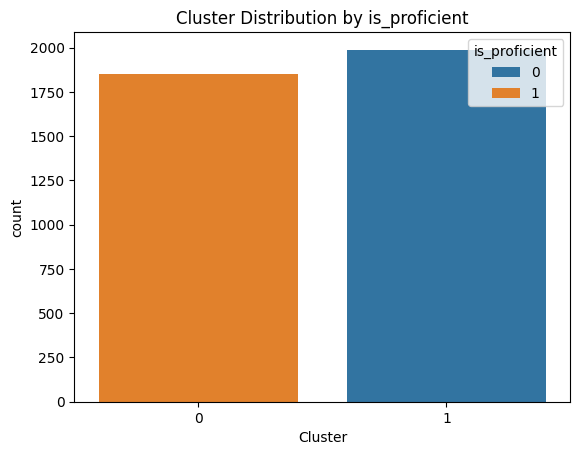

In [166]:
sns.countplot(data=subset_actScience11_df, x='Cluster', hue='is_proficient')
plt.title('Cluster Distribution by is_proficient')
plt.show()


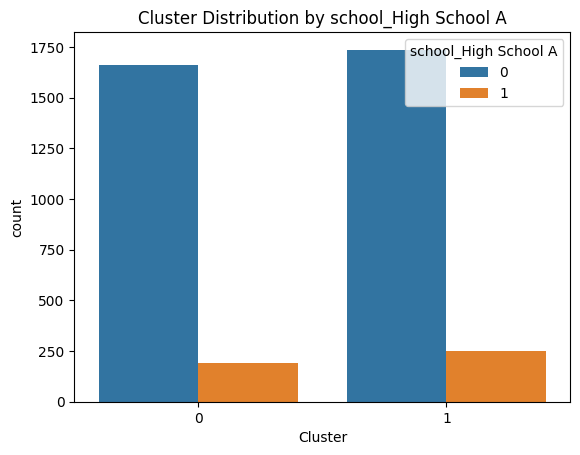

In [167]:
sns.countplot(data=subset_actScience11_df, x='Cluster', hue='school_High School A')
plt.title('Cluster Distribution by school_High School A')
plt.show()


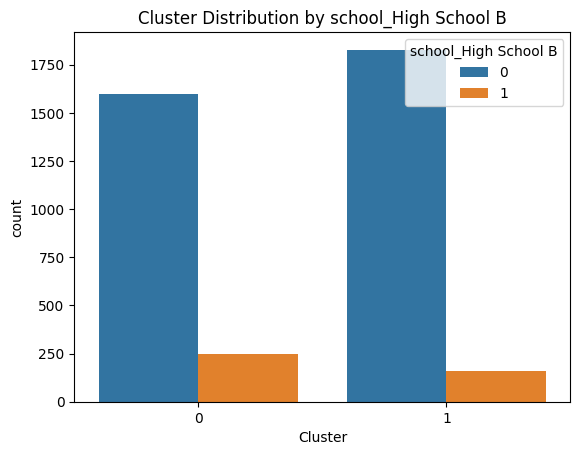

In [168]:
sns.countplot(data=subset_actScience11_df, x='Cluster', hue='school_High School B')
plt.title('Cluster Distribution by school_High School B')
plt.show()


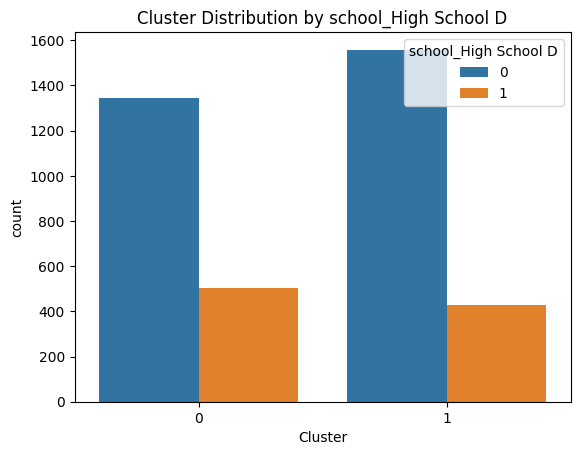

In [169]:
sns.countplot(data=subset_actScience11_df, x='Cluster', hue='school_High School D')
plt.title('Cluster Distribution by school_High School D')
plt.show()

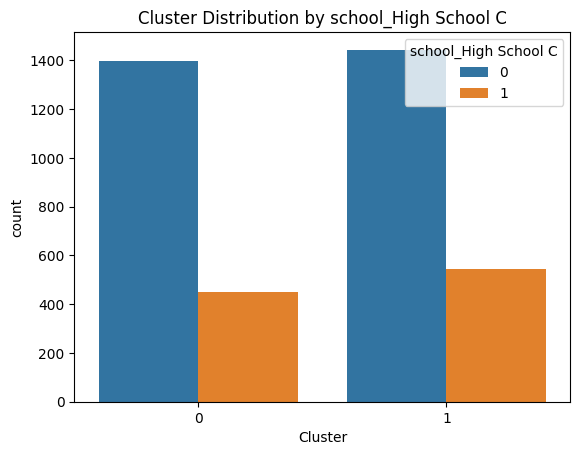

In [170]:
sns.countplot(data=subset_actScience11_df, x='Cluster', hue='school_High School C')
plt.title('Cluster Distribution by school_High School C')
plt.show()

# End Clustering for ACT Science 11

# Begin Clustering for ACT Reading 11

In [171]:
columns_to_convert = ['is_proficient', 'school_High School A', 'school_High School B', 'school_High School C', 'school_High School D'] 
actReading11_df[columns_to_convert] = actReading11_df[columns_to_convert].astype(int)
subset_actReading11_df = actReading11_df[['studentId', 'is_proficient', 'school_High School A', 'school_High School B', 'school_High School C', 'school_High School D']]
subset_actReading11_df.head()


,studentId,is_proficient,school_High School A,school_High School B,school_High School C,school_High School D
0,45054,0,1,0,0,0
1,45054,0,1,0,0,0
2,45440,1,0,0,0,0
3,45440,1,0,0,0,0
4,45440,1,0,0,0,0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8468.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8468.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8468.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8468.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8468.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 776, cost: 6606.0
Run 1, iteration: 2/100, moves: 289, cost: 6606.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1331, cost: 6600.0
Run 2, iteration: 2/100, mo

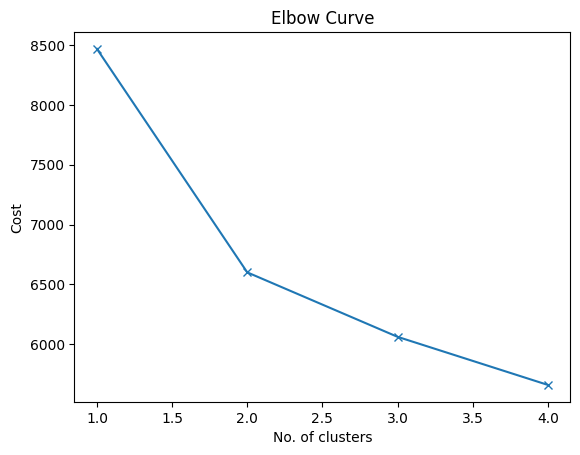

In [172]:
cost = []
K = range(1,5)
for k in list(K):
   kmode = KModes(n_clusters = k, init = "random", n_init = 5, verbose = 1)
   kmode.fit_predict(subset_actReading11_df)
   cost.append(kmode.cost_)
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

In [173]:
#Using 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(subset_actReading11_df)
subset_actReading11_df['Cluster'] = clusters
subset_actReading11_df.head()
print(subset_actReading11_df['Cluster'].value_counts())


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6600.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 402, cost: 6600.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 739, cost: 6600.0
Run 3, iteration: 2/100, moves: 0, cost: 6600.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 534, cost: 6606.0
Run 4, iteration: 2/100, moves: 0, cost: 6606.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 6600.0
Best run was number 1
Cluster
1    1973
0    1862
Name: count, dtype: int64


/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_70661/373978696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_actReading11_df['Cluster'] = clusters


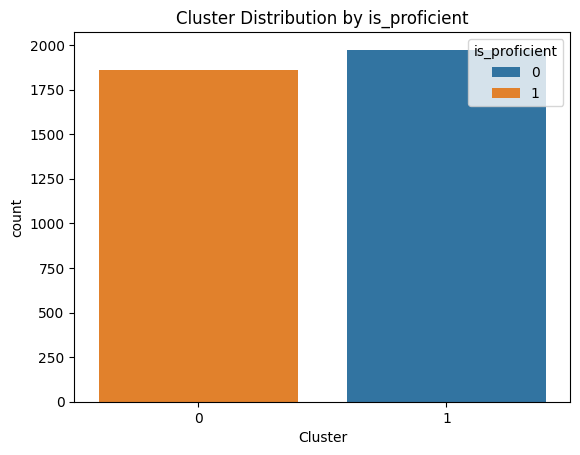

In [174]:
sns.countplot(data=subset_actReading11_df, x='Cluster', hue='is_proficient')
plt.title('Cluster Distribution by is_proficient')
plt.show()


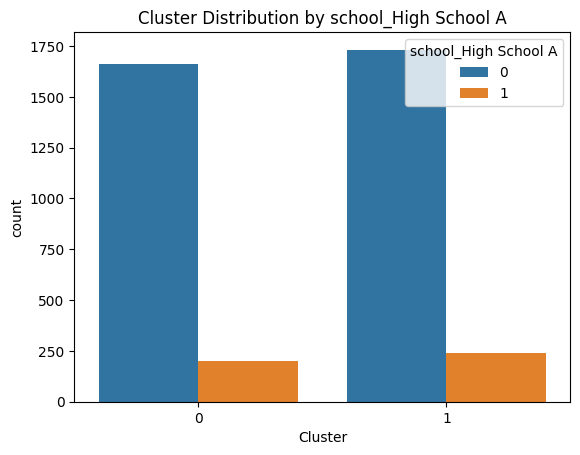

In [175]:
sns.countplot(data=subset_actReading11_df, x='Cluster', hue='school_High School A')
plt.title('Cluster Distribution by school_High School A')
plt.show()


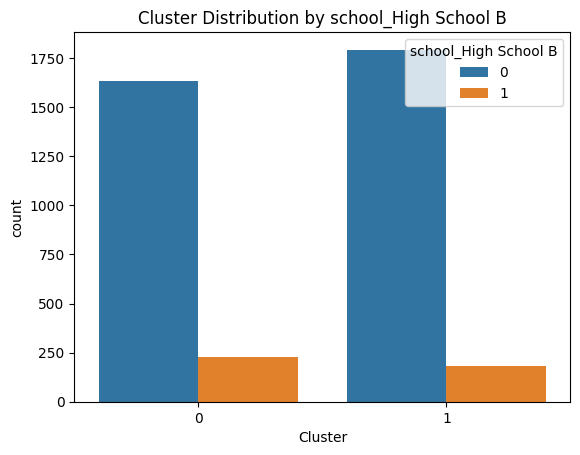

In [176]:
sns.countplot(data=subset_actReading11_df, x='Cluster', hue='school_High School B')
plt.title('Cluster Distribution by school_High School B')
plt.show()

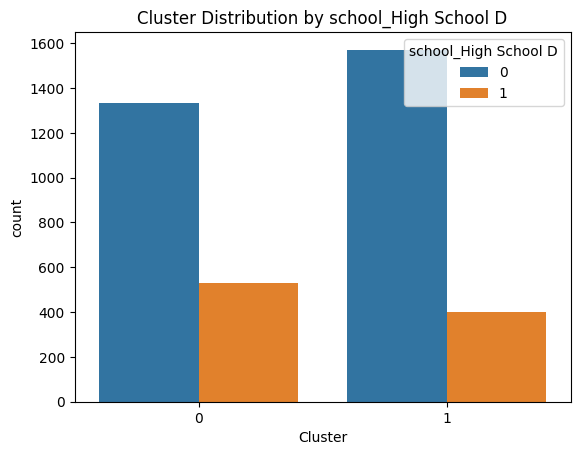

In [177]:
sns.countplot(data=subset_actReading11_df, x='Cluster', hue='school_High School D')
plt.title('Cluster Distribution by school_High School D')
plt.show()

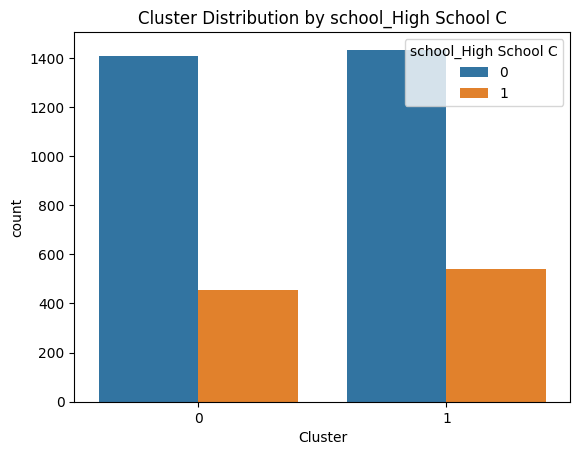

In [178]:
sns.countplot(data=subset_actReading11_df, x='Cluster', hue='school_High School C')
plt.title('Cluster Distribution by school_High School C')
plt.show()

# End Clustering for ACT Reading 11